# Семинар 8.1
Бустинг

Автор Д.В.Яценко

In [6]:
# %pip install logitboost

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles,make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics 
import pandas as pd

## Подготовка данных

создание датасета

In [8]:
X0,y0=make_circles(n_samples=(200,1),noise=0.12,random_state=42,shuffle=True)
X1,y1=make_moons(n_samples=(400),noise=0.12,random_state=42,shuffle=True)
y1+=1
X0*=2
X0[:,0]+=0.5
X=np.vstack((X0,X1))
y=np.vstack((y0.reshape(-1,1),y1.reshape(-1,1)))

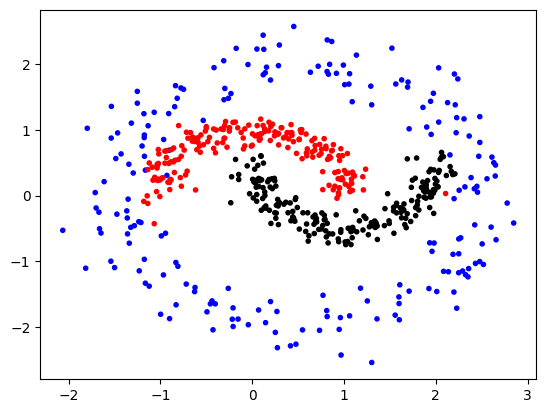

In [9]:
d=['b','r','black']
plt.scatter(X[:,0],X[:,1],c=[d[y_] for y_ in y.reshape(-1)],marker=".")

нормализация

In [10]:
scaler = StandardScaler()
scaler.fit(X)
data=scaler.transform(X)

<Axes: xlabel='x', ylabel='y'>

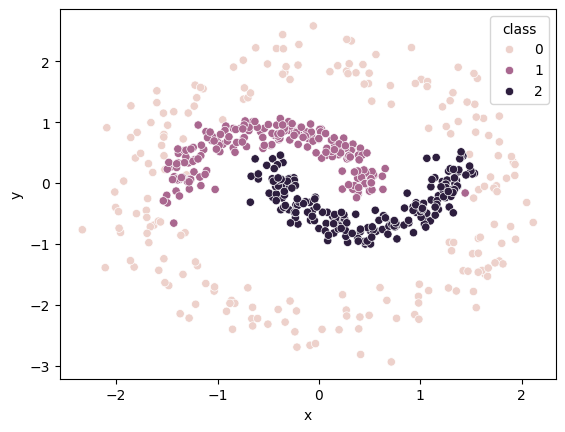

In [11]:
import seaborn as sns
d=pd.DataFrame(data,columns=["x","y"])
d["class"]=y
sns.scatterplot(data=d, x="x", y="y", hue="class")

разбиение

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.35, random_state=42)

утилита рисовния

In [13]:
import matplotlib.pyplot as plt
def visualise(clf,X_test,Y_test):
    X1,X2 = np.mgrid[X_test[:,0].min():X_test[:,0].max():0.02, X_test[:,1].min():X_test[:,1].max():0.02]
    X_ = np.dstack((X1,X2)).reshape(-1,2)
    y_ = clf.predict(X_).astype(int)
    d = {0:"lightblue",1:"pink",2:"gray"}
    plt.scatter(X_[:,0],X_[:,1], c=[d[y] for y in y_.reshape(-1)],marker='.') # раскрашиваем поле по предсказанию
    d = {0:"blue",1:"red",2:"black"}
    plt.scatter(X_test[:,0], X_test[:,1], c=[d[y] for y in y_test.reshape(-1)]) # рисуем тестовый датасет 

## Сравнение моделей

### Дерево

In [14]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

0.9620853080568721

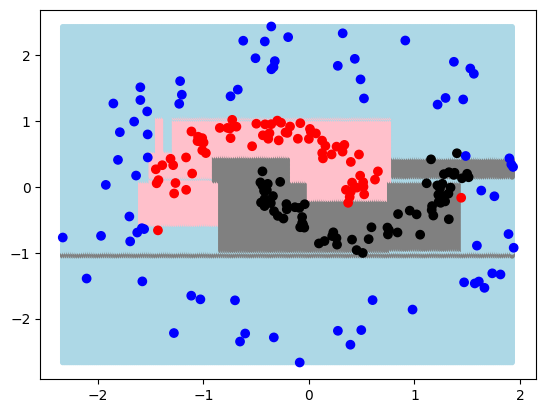

In [15]:
visualise(clf,X_test,y_test)

### Лес

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(random_state=42, n_estimators=100,max_depth=6)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

/tmp/ipykernel_4053/2981492673.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


0.966824644549763

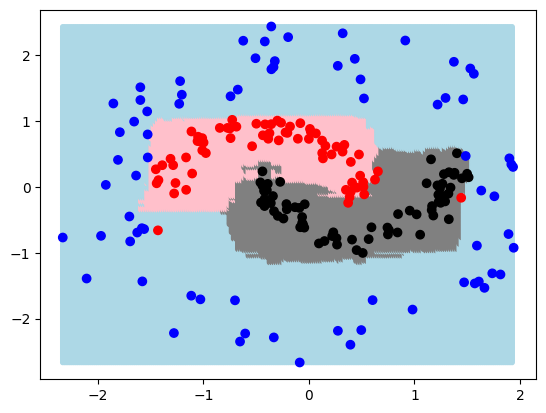

In [17]:
visualise(clf,X_test,y_test)

### Градиентный бустинг деревьев

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,max_depth=3, random_state=42)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)


/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.990521327014218

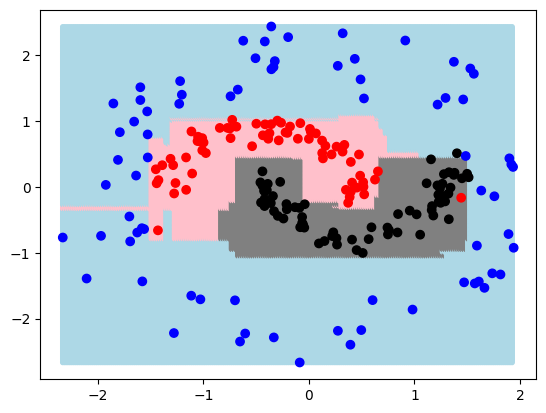

In [19]:
visualise(clf,X_test,y_test)

### Catboost

In [20]:
!nvidia-smi

Fri Mar 29 15:34:40 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti     Off |   00000000:08:00.0 Off |                  N/A |
| 31%   32C    P8             N/A /   75W |      35MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=100,
                           task_type="GPU",
                           devices='0:1',random_state=42)
clf.fit(X_train, y_train, verbose=False)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

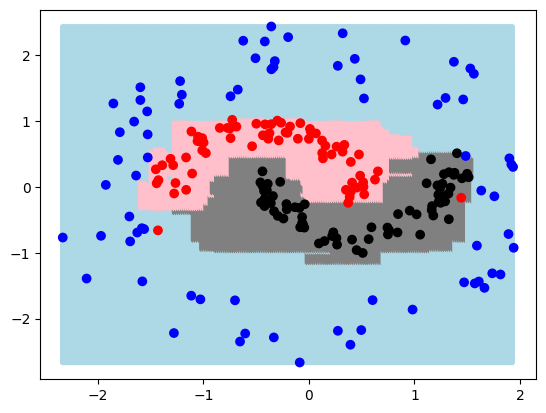

In [17]:
visualise(clf,X_test,y_test)

## Прочие модели

## Линейная модель

In [18]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5829383886255924

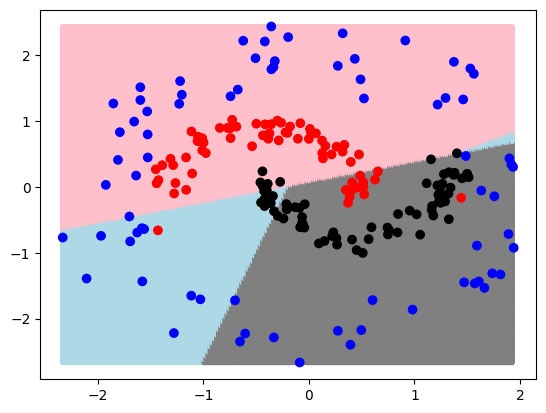

In [19]:
visualise(clf,X_test,y_test)

### Бустинг линейных моделей

In [20]:
#!pip3 install logitboost

In [21]:
from sklearn.linear_model import LinearRegression
from logitboost import LogitBoost
clf = LogitBoost(n_estimators=100, base_estimator= LinearRegression(),random_state=42)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)
/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6777251184834123

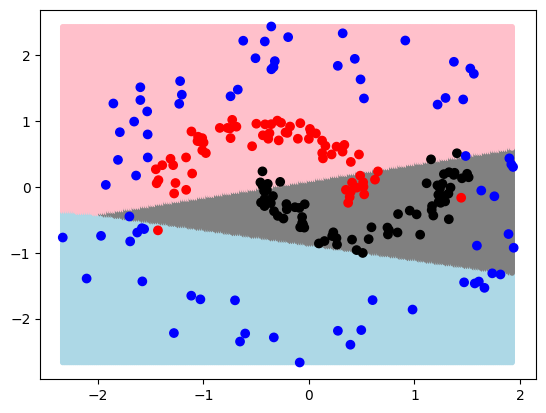

In [22]:
visualise(clf,X_test,y_test)

## Логистическая регрессия

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5071090047393365

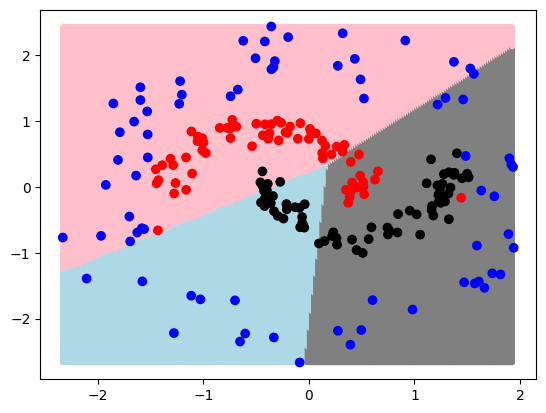

In [24]:
visualise(clf,X_test,y_test)

## SVM kernel trick

In [25]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
metrics.accuracy_score(y_test,predict)

/opt/jupyter_venvs/mipt_venv/lib64/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9715639810426541

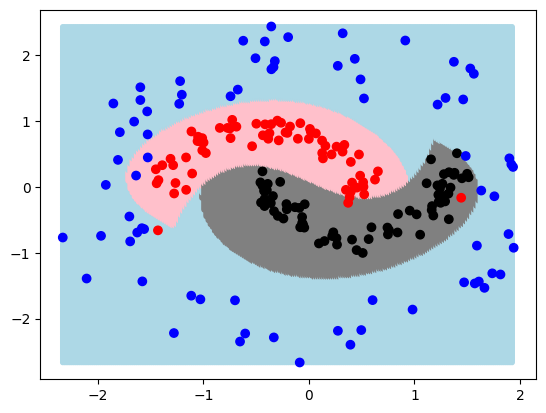

In [26]:
visualise(clf,X_test,y_test)